# SPY vs VOO

In [1]:
# How similar are SPY and VOO?
# Analysis and Comparison

# Import Libraries

In [2]:
import datetime
import calendar
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [3]:
h = {'SPY':[5.66,5.08,4.27,2.04,1.67], 'VOO':[5.67,5.09,4.27,2.04,1.67]} 
df_h = pd.DataFrame(h, index =['Microsoft', 'Apple', 'Amazon', 'Facebook', 'Alphabet']) 
df_h

,SPY,VOO
Microsoft,5.66,5.67
Apple,5.08,5.09
Amazon,4.27,4.27
Facebook,2.04,2.04
Alphabet,1.67,1.67


# SPY Data

In [4]:
# Start date
start_date = datetime.datetime(2010,9,9)

# Today's Date
end_date = datetime.date.today()

# Pull Data
df_spy = web.DataReader('SPY','yahoo',start_date, end_date)

# Reset index after creating date column
df_spy = df_spy.reset_index()
df_spy

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-09-09,111.680000,110.620003,111.650002,110.919998,147017900.0,91.087509
1,2010-09-10,111.610001,110.870003,111.120003,111.480003,127819000.0,91.547379
2,2010-09-13,112.949997,112.129997,112.580002,112.720001,178503500.0,92.565651
3,2010-09-14,113.290001,112.080002,112.500000,112.650002,209823600.0,92.508194
4,2010-09-15,113.209999,111.980003,112.320000,113.080002,168608400.0,92.861305
...,...,...,...,...,...,...,...
2442,2020-05-22,295.630005,293.220001,294.570007,295.440002,63958200.0,295.440002
2443,2020-05-26,302.190002,295.459991,301.929993,299.079987,88951400.0,299.079987
2444,2020-05-27,303.570007,296.869995,302.119995,303.529999,104817400.0,303.529999
2445,2020-05-28,306.839996,302.239990,304.649994,302.970001,90405200.0,302.970001


# VOO Data

In [5]:
# Start date
start_date = datetime.datetime(2010,9,9)

# Today's date
end_date = datetime.date.today()

# Pull Data
df_voo = web.DataReader('VOO','yahoo',start_date,end_date)

# Reset index after creating date column
df_voo = df_voo.reset_index()
df_voo

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-09-09,102.500000,101.139999,102.500000,101.320000,26500.0,83.143929
1,2010-09-10,101.860001,101.300003,101.680000,101.779999,8600.0,83.521400
2,2010-09-13,103.139999,102.500000,102.959999,103.059998,33700.0,84.571770
3,2010-09-14,103.480003,102.379997,102.839996,103.040001,59400.0,84.555374
4,2010-09-15,103.379997,102.400002,102.620003,103.300003,9200.0,84.768715
...,...,...,...,...,...,...,...
2442,2020-05-22,271.720001,269.500000,270.760010,271.549988,2296400.0,271.549988
2443,2020-05-26,277.739990,274.549988,277.529999,275.040009,4911800.0,275.040009
2444,2020-05-27,279.049988,272.859985,277.779999,279.049988,5152400.0,279.049988
2445,2020-05-28,282.040009,277.809998,280.029999,278.500000,4630600.0,278.500000


# First Look

In [6]:
# Make one dataframe of date and adjusted close price of SPY and VOO
df_both = pd.DataFrame(df_spy['Date'])
df_both['SPY'] = df_spy['Adj Close']
df_both['VOO'] = df_voo['Adj Close']
df_both

,Date,SPY,VOO
0,2010-09-09,91.087509,83.143929
1,2010-09-10,91.547379,83.521400
2,2010-09-13,92.565651,84.571770
3,2010-09-14,92.508194,84.555374
4,2010-09-15,92.861305,84.768715
...,...,...,...
2442,2020-05-22,295.440002,271.549988
2443,2020-05-26,299.079987,275.040009
2444,2020-05-27,303.529999,279.049988
2445,2020-05-28,302.970001,278.500000


C:\Users\mchin\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


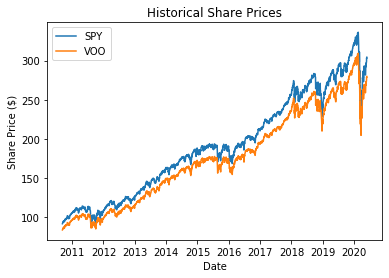

In [7]:
# Plot all data
plt.plot(df_both['Date'],df_both['SPY'],'C0')
plt.plot(df_both['Date'],df_both['VOO'],'C1')
plt.xlabel('Date')
plt.ylabel('Share Price ($)')
plt.legend(['SPY','VOO'])
plt.title('Historical Share Prices')
plt.show()

# Daily Price Difference

In [8]:
# Daily difference between stocks
df_both['SPY-VOO Price Diff'] = df_both['SPY']-df_both['VOO']

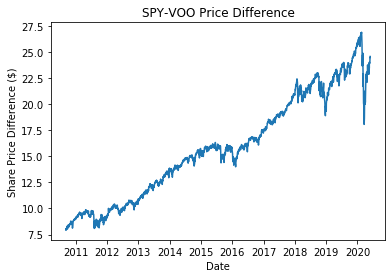

In [9]:
# Plot difference between stocks
plt.plot(df_both['Date'],df_both['SPY-VOO Price Diff'])
plt.xlabel('Date')
plt.ylabel('Share Price Difference ($)')
plt.title('SPY-VOO Price Difference')
plt.show()

# Daily Price Difference by Percent

In [10]:
df_both['SPY-VOO Price Diff / SPY'] = (df_both['SPY-VOO Price Diff']/df_both['SPY'])*100
df_both['SPY-VOO Price Diff / VOO'] = (df_both['SPY-VOO Price Diff']/df_both['VOO'])*100
df_both['SPY-VOO % Price Diff'] = df_both['SPY-VOO Price Diff / VOO']-df_both['SPY-VOO Price Diff / SPY']
df_both

,Date,SPY,VOO,SPY-VOO Price Diff,SPY-VOO Price Diff / SPY,SPY-VOO Price Diff / VOO,SPY-VOO % Price Diff
0,2010-09-09,91.087509,83.143929,7.943581,8.720823,9.554012,0.833188
1,2010-09-10,91.547379,83.521400,8.025978,8.767021,9.609487,0.842466
2,2010-09-13,92.565651,84.571770,7.993881,8.635905,9.452186,0.816282
3,2010-09-14,92.508194,84.555374,7.952820,8.596882,9.405458,0.808576
4,2010-09-15,92.861305,84.768715,8.092590,8.714707,9.546671,0.831964
...,...,...,...,...,...,...,...
2442,2020-05-22,295.440002,271.549988,23.890015,8.086249,8.797649,0.711400
2443,2020-05-26,299.079987,275.040009,24.039978,8.037976,8.740539,0.702562
2444,2020-05-27,303.529999,279.049988,24.480011,8.065104,8.772626,0.707521
2445,2020-05-28,302.970001,278.500000,24.470001,8.076708,8.786356,0.709648


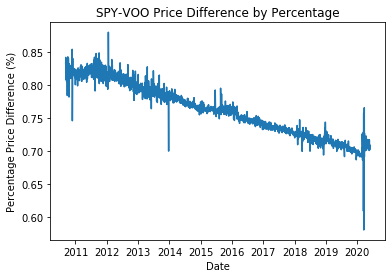

In [11]:
# Plot percent difference between stocks
plt.plot(df_both['Date'],df_both['SPY-VOO % Price Diff'])
plt.xlabel('Date')
plt.ylabel('Percentage Price Difference (%)')
plt.title('SPY-VOO Price Difference by Percentage')
plt.show()

# Day-to-Day Raw Price Comparison

In [12]:
# First order difference
# Share price difference between current day and next day
df_both['SPY First Difference'] = df_both['SPY'].diff()
df_both['VOO First Difference'] = df_both['VOO'].diff()

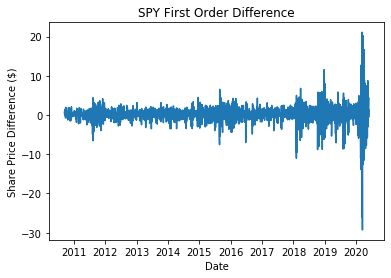

In [13]:
# Plot SPY first order difference
plt.plot(df_both['Date'],df_both['SPY First Difference'],'C0')
plt.xlabel('Date')
plt.ylabel('Share Price Difference ($)')
plt.title('SPY First Order Difference')
plt.show()

C:\Users\mchin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:391: RuntimeWarning: invalid value encountered in greater_equal
  keep = (a >= first_edge)
C:\Users\mchin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:392: RuntimeWarning: invalid value encountered in less_equal
  keep &= (a <= last_edge)
C:\Users\mchin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\mchin\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'Count')

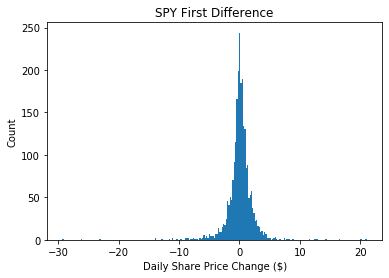

In [14]:
# Plot histogram of SPY price change
spy_raw_hist = plt.hist(df_both['SPY First Difference'], bins = 'auto')
plt.title('SPY First Difference')
plt.xlabel('Daily Share Price Change ($)')
plt.ylabel('Count')

In [15]:
# Descriptive statistics of SPY first order difference
spy_raw_stat = pd.Series(df_both['SPY First Difference']).describe()

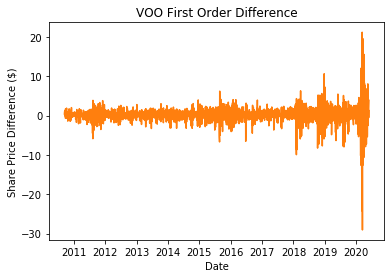

In [16]:
# Plot VOO first order difference
plt.plot(df_both['Date'],df_both['VOO First Difference'],'C1')
plt.xlabel('Date')
plt.ylabel('Share Price Difference ($)')
plt.title('VOO First Order Difference')
plt.show()

Text(0, 0.5, 'Count')

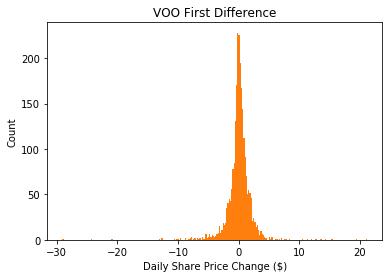

In [17]:
# Plot histogram of VOO price change
voo_raw_hist = plt.hist(df_both['VOO First Difference'], bins = 'auto', color='C1')
plt.title('VOO First Difference')
plt.xlabel('Daily Share Price Change ($)')
plt.ylabel('Count')

In [18]:
# Descriptive statistics of VOO first order difference
voo_raw_stat = pd.Series(df_both['VOO First Difference']).describe()

In [19]:
raw_stat = pd.concat([spy_raw_stat,voo_raw_stat],axis=1)
raw_stat.columns = ['SPY','VOO']
raw_stat.drop(['count'])

,SPY,VOO
mean,0.087176,0.080379
std,2.286873,2.135074
min,-29.297714,-29.069992
25%,-0.570957,-0.521732
50%,0.112923,0.112923
75%,0.901096,0.837849
max,21.085999,21.160004


In [20]:
# t-test
stats.ttest_ind(df_both['SPY First Difference'][1:],df_both['VOO First Difference'][1:],equal_var = False)

Ttest_indResult(statistic=0.10745248385011616, pvalue=0.9144344482561804)

# Day-to-Day Percent Change Comparison

In [21]:
df_both['SPY Percent Change'] = (df_both['SPY'].pct_change())*100
df_both['VOO Percent Change'] = (df_both['VOO'].pct_change())*100
df_both

,Date,SPY,VOO,SPY-VOO Price Diff,SPY-VOO Price Diff / SPY,SPY-VOO Price Diff / VOO,SPY-VOO % Price Diff,SPY First Difference,VOO First Difference,SPY Percent Change,VOO Percent Change
0,2010-09-09,91.087509,83.143929,7.943581,8.720823,9.554012,0.833188,NaN,NaN,NaN,NaN
1,2010-09-10,91.547379,83.521400,8.025978,8.767021,9.609487,0.842466,0.459869,0.377472,0.504865,0.453998
2,2010-09-13,92.565651,84.571770,7.993881,8.635905,9.452186,0.816282,1.018272,1.050369,1.112290,1.257605
3,2010-09-14,92.508194,84.555374,7.952820,8.596882,9.405458,0.808576,-0.057457,-0.016396,-0.062072,-0.019387
4,2010-09-15,92.861305,84.768715,8.092590,8.714707,9.546671,0.831964,0.353111,0.213341,0.381708,0.252309
...,...,...,...,...,...,...,...,...,...,...,...
2442,2020-05-22,295.440002,271.549988,23.890015,8.086249,8.797649,0.711400,0.559998,0.609985,0.189907,0.225137
2443,2020-05-26,299.079987,275.040009,24.039978,8.037976,8.740539,0.702562,3.639984,3.490021,1.232055,1.285222
2444,2020-05-27,303.529999,279.049988,24.480011,8.065104,8.772626,0.707521,4.450012,4.009979,1.487900,1.457962
2445,2020-05-28,302.970001,278.500000,24.470001,8.076708,8.786356,0.709648,-0.559998,-0.549988,-0.184495,-0.197093


In [22]:
df_both['Greater'] = np.where(df_both['SPY Percent Change']>df_both['VOO Percent Change'],'SPY',np.where(df_both['SPY Percent Change']==df_both['VOO Percent Change'],'Equal','VOO'))
df_both['daily diff'] = df_both['SPY Percent Change']-df_both['VOO Percent Change']
df_both

,Date,SPY,VOO,SPY-VOO Price Diff,SPY-VOO Price Diff / SPY,SPY-VOO Price Diff / VOO,SPY-VOO % Price Diff,SPY First Difference,VOO First Difference,SPY Percent Change,VOO Percent Change,Greater,daily diff
0,2010-09-09,91.087509,83.143929,7.943581,8.720823,9.554012,0.833188,NaN,NaN,NaN,NaN,VOO,NaN
1,2010-09-10,91.547379,83.521400,8.025978,8.767021,9.609487,0.842466,0.459869,0.377472,0.504865,0.453998,SPY,0.050867
2,2010-09-13,92.565651,84.571770,7.993881,8.635905,9.452186,0.816282,1.018272,1.050369,1.112290,1.257605,VOO,-0.145315
3,2010-09-14,92.508194,84.555374,7.952820,8.596882,9.405458,0.808576,-0.057457,-0.016396,-0.062072,-0.019387,VOO,-0.042685
4,2010-09-15,92.861305,84.768715,8.092590,8.714707,9.546671,0.831964,0.353111,0.213341,0.381708,0.252309,SPY,0.129399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2442,2020-05-22,295.440002,271.549988,23.890015,8.086249,8.797649,0.711400,0.559998,0.609985,0.189907,0.225137,VOO,-0.035230
2443,2020-05-26,299.079987,275.040009,24.039978,8.037976,8.740539,0.702562,3.639984,3.490021,1.232055,1.285222,VOO,-0.053167
2444,2020-05-27,303.529999,279.049988,24.480011,8.065104,8.772626,0.707521,4.450012,4.009979,1.487900,1.457962,SPY,0.029938
2445,2020-05-28,302.970001,278.500000,24.470001,8.076708,8.786356,0.709648,-0.559998,-0.549988,-0.184495,-0.197093,SPY,0.012598


Text(0.5, 1.0, 'Number of days an ETF increased more')

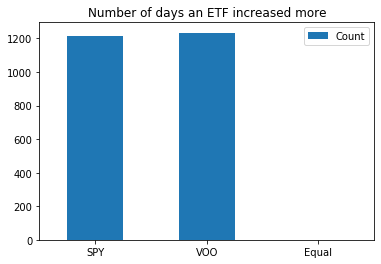

In [23]:
etf_counts_daily = df_both['Greater'].value_counts()
df_len_daily = len(df_both)
equal_counts_daily = df_len_daily-sum(etf_counts_daily)
equal_counts_daily

bar_df_daily = pd.DataFrame({'ETF':['SPY', 'VOO', 'Equal'], 'Count':[etf_counts_daily[1],etf_counts_daily[0],equal_counts_daily]})
bar_plot_daily = bar_df_daily.plot.bar(x='ETF', y='Count', rot=0)
plt.xlabel('')
plt.title('Number of days an ETF increased more')

Text(0, 0.5, 'Count')

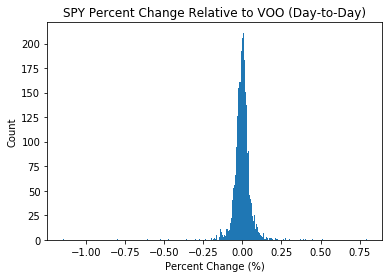

In [24]:
daily_per_hist = plt.hist(df_both['daily diff'], bins = 'auto')
plt.title('SPY Percent Change Relative to VOO (Day-to-Day)')
plt.xlabel('Percent Change (%)')
plt.ylabel('Count')

(-10, 10)

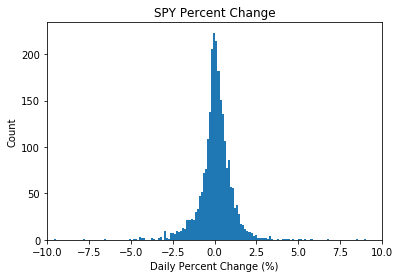

In [25]:
spy_per_hist = plt.hist(df_both['SPY Percent Change'], bins = 'auto')
plt.title('SPY Percent Change')
plt.xlabel('Daily Percent Change (%)')
plt.ylabel('Count')
plt.xlim([-10,10])

In [26]:
daily_stat = pd.Series(df_both['daily diff']).describe()

In [27]:
spy_per_stat = pd.Series(df_both['SPY Percent Change']).describe()

(-10, 10)

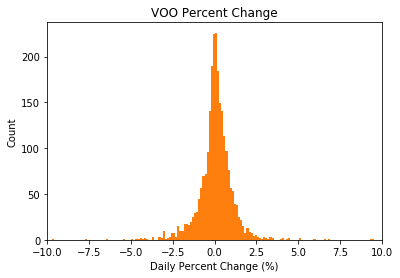

In [28]:
voo_per_hist = plt.hist(df_both['VOO Percent Change'], bins = 'auto', color='C1')
plt.title('VOO Percent Change')
plt.xlabel('Daily Percent Change (%)')
plt.ylabel('Count')
plt.xlim([-10,10])

In [29]:
voo_per_stat = pd.Series(df_both['VOO Percent Change']).describe()

In [30]:
# Daily percent change difference between stocks
df_both['SPY-VOO Percent Change Difference'] = df_both['SPY Percent Change']-df_both['VOO Percent Change']

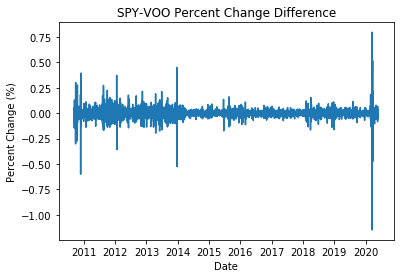

In [31]:
plt.plot(df_both['Date'],df_both['SPY-VOO Percent Change Difference'])
plt.xlabel('Date')
plt.ylabel('Percent Change (%)')
plt.title('SPY-VOO Percent Change Difference')
plt.show()

In [32]:
per_stat = pd.concat([spy_per_stat,voo_per_stat],axis=1)
per_stat.columns = ['SPY','VOO']
per_stat.drop(['count'])

,SPY,VOO
mean,0.055058,0.055491
std,1.068170,1.081599
min,-10.942371,-11.738811
25%,-0.319552,-0.321196
50%,0.064602,0.069444
75%,0.515910,0.523442
max,9.060326,9.536396


In [33]:
# t-test
stats.ttest_ind(df_both['SPY Percent Change'][1:],df_both['VOO Percent Change'][1:],equal_var = False)

Ttest_indResult(statistic=-0.014071021881408853, pvalue=0.9887738934677581)

# 1-year Percent Change

In [34]:
df_1year_return = pd.DataFrame(df_both, columns = ['Date','SPY','VOO'])
df_1year_return

,Date,SPY,VOO
0,2010-09-09,91.087509,83.143929
1,2010-09-10,91.547379,83.521400
2,2010-09-13,92.565651,84.571770
3,2010-09-14,92.508194,84.555374
4,2010-09-15,92.861305,84.768715
...,...,...,...
2442,2020-05-22,295.440002,271.549988
2443,2020-05-26,299.079987,275.040009
2444,2020-05-27,303.529999,279.049988
2445,2020-05-28,302.970001,278.500000


In [35]:
df_1year_return['Date 1-year'] = df_1year_return['Date'] + pd.DateOffset(years=1)
df_1year_return

,Date,SPY,VOO,Date 1-year
0,2010-09-09,91.087509,83.143929,2011-09-09
1,2010-09-10,91.547379,83.521400,2011-09-10
2,2010-09-13,92.565651,84.571770,2011-09-13
3,2010-09-14,92.508194,84.555374,2011-09-14
4,2010-09-15,92.861305,84.768715,2011-09-15
...,...,...,...,...
2442,2020-05-22,295.440002,271.549988,2021-05-22
2443,2020-05-26,299.079987,275.040009,2021-05-26
2444,2020-05-27,303.529999,279.049988,2021-05-27
2445,2020-05-28,302.970001,278.500000,2021-05-28


In [36]:
df_join_1 = pd.DataFrame(df_both, columns = ['Date','SPY','VOO'])
df_join_1.columns = ['Date 1-year','SPY','VOO']

df_1year_return = pd.merge(df_1year_return,df_join_1,on='Date 1-year',how='left').dropna()

In [37]:
df_1year_return['SPY 1-year'] = (df_1year_return['SPY_y']/df_1year_return['SPY_x'])*100
df_1year_return['VOO 1-year'] = (df_1year_return['VOO_y']/df_1year_return['VOO_x'])*100

df_1year_return['Greater'] = np.where(df_1year_return['SPY 1-year']>df_1year_return['VOO 1-year'],'SPY',np.where(df_1year_return['SPY 1-year']==df_1year_return['VOO 1-year'],'Equal','VOO'))
df_1year_return['1-year diff'] = df_1year_return['SPY 1-year']-df_1year_return['VOO 1-year']

df_1year_return

,Date,SPY_x,VOO_x,Date 1-year,SPY_y,VOO_y,SPY 1-year,VOO 1-year,Greater,1-year diff
0,2010-09-09,91.087509,83.143929,2011-09-09,97.103401,88.679443,106.604519,106.657750,VOO,-0.053231
2,2010-09-13,92.565651,84.571770,2011-09-13,98.627983,90.051491,106.549224,106.479374,SPY,0.069851
3,2010-09-14,92.508194,84.555374,2011-09-14,99.993370,91.323112,108.091365,108.003913,SPY,0.087453
4,2010-09-15,92.861305,84.768715,2011-09-15,101.719017,92.895935,109.538647,109.587523,VOO,-0.048876
5,2010-09-16,92.836655,84.735901,2011-09-16,102.321030,93.448051,110.216196,110.281534,VOO,-0.065338
...,...,...,...,...,...,...,...,...,...,...
2187,2019-05-20,278.264313,255.796249,2020-05-20,296.929993,272.899994,106.707896,106.686472,SPY,0.021424
2188,2019-05-21,280.773041,257.963715,2020-05-21,294.880005,270.940002,105.024330,105.030276,VOO,-0.005946
2189,2019-05-22,279.910645,257.257538,2020-05-22,295.440002,271.549988,105.547970,105.555697,VOO,-0.007727
2192,2019-05-28,274.540405,252.402893,2020-05-28,302.970001,278.500000,110.355341,110.339464,SPY,0.015877


In [38]:
etf_counts_1 = df_1year_return['Greater'].value_counts()
df_len_1 = len(df_1year_return)
equal_counts_1 = df_len_1-sum(etf_counts_1)
equal_counts_1

0

Text(0.5, 1.0, 'Number of 1-year periods an ETF increased more')

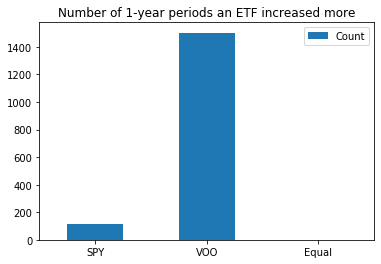

In [39]:
bar_df_1 = pd.DataFrame({'ETF':['SPY', 'VOO', 'Equal'], 'Count':[etf_counts_1[1],etf_counts_1[0],equal_counts_1]})
bar_plot_1 = bar_df_1.plot.bar(x='ETF', y='Count', rot=0)
plt.xlabel('')
plt.title('Number of 1-year periods an ETF increased more')

Text(0, 0.5, 'Count')

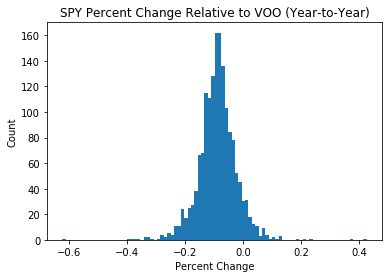

In [40]:
y1_per_hist = plt.hist(df_1year_return['1-year diff'], bins = 'auto')
plt.title('SPY Percent Change Relative to VOO (Year-to-Year)')
plt.xlabel('Percent Change')
plt.ylabel('Count')

In [41]:
y1_stat = pd.Series(df_1year_return['1-year diff']).describe()

# 5-Year Percent Change

In [42]:
df_5year_return = pd.DataFrame(df_both, columns = ['Date','SPY','VOO'])
df_5year_return

,Date,SPY,VOO
0,2010-09-09,91.087509,83.143929
1,2010-09-10,91.547379,83.521400
2,2010-09-13,92.565651,84.571770
3,2010-09-14,92.508194,84.555374
4,2010-09-15,92.861305,84.768715
...,...,...,...
2442,2020-05-22,295.440002,271.549988
2443,2020-05-26,299.079987,275.040009
2444,2020-05-27,303.529999,279.049988
2445,2020-05-28,302.970001,278.500000


In [43]:
df_5year_return['Date 5-year'] = df_5year_return['Date'] + pd.DateOffset(years=5)
df_5year_return

,Date,SPY,VOO,Date 5-year
0,2010-09-09,91.087509,83.143929,2015-09-09
1,2010-09-10,91.547379,83.521400,2015-09-10
2,2010-09-13,92.565651,84.571770,2015-09-13
3,2010-09-14,92.508194,84.555374,2015-09-14
4,2010-09-15,92.861305,84.768715,2015-09-15
...,...,...,...,...
2442,2020-05-22,295.440002,271.549988,2025-05-22
2443,2020-05-26,299.079987,275.040009,2025-05-26
2444,2020-05-27,303.529999,279.049988,2025-05-27
2445,2020-05-28,302.970001,278.500000,2025-05-28


In [44]:
df_join_5 = pd.DataFrame(df_both, columns = ['Date','SPY','VOO'])
df_join_5.columns = ['Date 5-year','SPY','VOO']

df_5year_return = pd.merge(df_5year_return,df_join_5,on='Date 5-year',how='left').dropna()

In [45]:
df_5year_return

,Date,SPY_x,VOO_x,Date 5-year,SPY_y,VOO_y
0,2010-09-09,91.087509,83.143929,2015-09-09,177.126312,162.298035
1,2010-09-10,91.547379,83.521400,2015-09-10,178.090149,163.206879
3,2010-09-14,92.508194,84.555374,2015-09-14,178.235657,163.270538
4,2010-09-15,92.861305,84.768715,2015-09-15,180.463486,165.397278
5,2010-09-16,92.836655,84.735901,2015-09-16,182.027481,166.842392
...,...,...,...,...,...,...
1183,2015-05-22,192.738388,176.641357,2020-05-22,295.440002,271.549988
1184,2015-05-26,190.666092,174.741623,2020-05-26,299.079987,275.040009
1185,2015-05-27,192.475937,176.351898,2020-05-27,303.529999,279.049988
1186,2015-05-28,192.258804,176.189041,2020-05-28,302.970001,278.500000


In [46]:
df_5year_return['SPY 5-year'] = (df_5year_return['SPY_y']/df_5year_return['SPY_x'])*100
df_5year_return['VOO 5-year'] = (df_5year_return['VOO_y']/df_5year_return['VOO_x'])*100

df_5year_return['Greater'] = np.where(df_5year_return['SPY 5-year']>df_5year_return['VOO 5-year'],'SPY',np.where(df_5year_return['SPY 5-year']==df_5year_return['VOO 5-year'],'Same','VOO'))
df_5year_return['5-year diff'] = df_5year_return['SPY 5-year']-df_5year_return['VOO 5-year']

df_5year_return

,Date,SPY_x,VOO_x,Date 5-year,SPY_y,VOO_y,SPY 5-year,VOO 5-year,Greater,5-year diff
0,2010-09-09,91.087509,83.143929,2015-09-09,177.126312,162.298035,194.457301,195.201306,VOO,-0.744005
1,2010-09-10,91.547379,83.521400,2015-09-10,178.090149,163.206879,194.533314,195.407258,VOO,-0.873945
3,2010-09-14,92.508194,84.555374,2015-09-14,178.235657,163.270538,192.670129,193.093035,VOO,-0.422906
4,2010-09-15,92.861305,84.768715,2015-09-15,180.463486,165.397278,194.336581,195.115943,VOO,-0.779362
5,2010-09-16,92.836655,84.735901,2015-09-16,182.027481,166.842392,196.072857,196.896935,VOO,-0.824078
...,...,...,...,...,...,...,...,...,...,...
1183,2015-05-22,192.738388,176.641357,2020-05-22,295.440002,271.549988,153.285500,153.729564,VOO,-0.444063
1184,2015-05-26,190.666092,174.741623,2020-05-26,299.079987,275.040009,156.860606,157.398108,VOO,-0.537502
1185,2015-05-27,192.475937,176.351898,2020-05-27,303.529999,279.049988,157.697634,158.234751,VOO,-0.537117
1186,2015-05-28,192.258804,176.189041,2020-05-28,302.970001,278.500000,157.584461,158.068855,VOO,-0.484394


In [47]:
etf_counts_5 = df_5year_return['Greater'].value_counts()
df_len_5 = len(df_5year_return)
equal_counts_5 = df_len_5-sum(etf_counts_5)
equal_counts_5

0

Text(0.5, 1.0, 'Number of 5-year periods an ETF increased more')

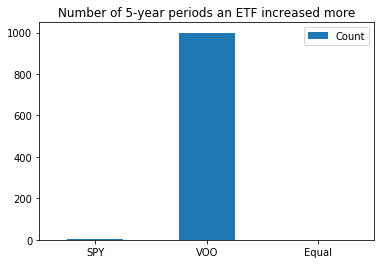

In [48]:
bar_df_5 = pd.DataFrame({'ETF':['SPY', 'VOO', 'Equal'], 'Count':[etf_counts_5[1],etf_counts_5[0],equal_counts_5]})
bar_plot_5 = bar_df_5.plot.bar(x='ETF', y='Count', rot=0)
plt.xlabel('')
plt.title('Number of 5-year periods an ETF increased more')

Text(0, 0.5, 'Count')

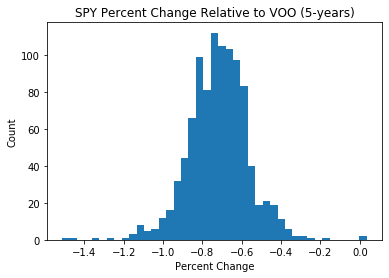

In [49]:
y5_per_hist = plt.hist(df_5year_return['5-year diff'], bins = 'auto')
plt.title('SPY Percent Change Relative to VOO (5-years)')
plt.xlabel('Percent Change')
plt.ylabel('Count')

In [50]:
y5_stat = pd.Series(df_5year_return['5-year diff']).describe()

In [51]:
return_stat = pd.concat([daily_stat,y1_stat,y5_stat],axis=1)
return_stat.columns = ['1 Day','1 Year','5 Years']
return_stat.drop(['count'])

,1 Day,1 Year,5 Years
mean,-0.000432,-0.087885,-0.718286
std,0.062995,0.067321,0.153591
min,-1.147891,-0.621519,-1.512045
25%,-0.022392,-0.122424,-0.813170
50%,-0.000323,-0.087104,-0.715778
75%,0.021255,-0.053830,-0.623945
max,0.796440,0.426496,0.034980
